## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt

### Problem 1:

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

[ Assume all of the ANOVA assumptions are satisfied ]

1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

1.6) Mention the business implications of performing ANOVA for this particular case study.

### Question 1.1)  State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]


### Answer 1.1:

In [2]:
df=pd.read_csv('Fever-1.csv')

In [3]:
df.head(10)

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6
5,1,2,2,4.2
6,1,2,3,4.9
7,1,2,4,4.7
8,1,3,1,4.8
9,1,3,2,4.5


#### $\underline{Quick Info:  }$    A and B are two ingredients in a compound for the relief of severe cases of hay fever. 'A' and 'B' are having 3 levels each. 'Relief' is given in unit of Hours. It is the hours of relief that the medicine provides after consuming.

In [4]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

### Checking the summary of the dataframe

In [5]:
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


### Checking distinct values of 'A' and 'B'

In [6]:
print(df.A.value_counts())
print(df.B.value_counts())


3    12
2    12
1    12
Name: A, dtype: int64
3    12
2    12
1    12
Name: B, dtype: int64


#### Here 1,2 & 3 are different levels for ingredient A and B

### Creating box plots

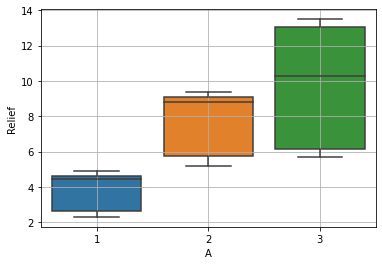

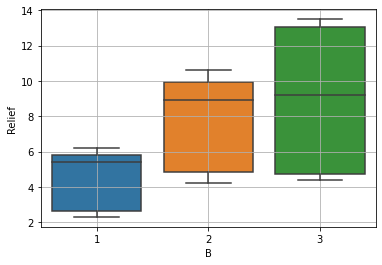

In [7]:
#fig.set_size_inches(8, 8)
sns.boxplot(x="A", y="Relief", data=df)
plt.grid()
plt.show()
sns.boxplot(x="B", y="Relief", data=df)
plt.grid()
plt.show()

#### Looking at above boxplot of 'Relief', we can observe that there is a change in the Relief across different ingredients.

### Formulating the hypothesis of the One-way ANOVA of 'A' variable with the 'Relief' variable.

$H_0$ : The mean hours of relief for different levels of compound A are equal.

$\mu_{A1} = \mu_{A2} = \mu_{A3}$

$H_1$ : At least for one of the levels of A, the mean hours of relief is different from the other.

$\mu_{A1} \neq \mu_{A2}$   or   $\mu_{A2} \neq \mu_{A3}$ or $\mu_{A1} \neq \mu_{A3}$


### Formulating the hypothesis of the One-way ANOVA of 'B' variable with the 'Relief' variable.

$H_0$ : The mean hours of relief for different levels of compound B are equal.

$\mu_{B1} = \mu_{B2} = \mu_{B3}$

$H_1$ : At least for one of the levels of B, the mean hours of relief is different from the other.

$\mu_{B1} \neq \mu_{B2}$   or   $\mu_{B2} \neq \mu_{B3}$ or $\mu_{B1} \neq \mu_{B3}$

### Question 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

### Answer 1.2:

### One Way Anova

#### Formulation of the hypothesis of the One-way ANOVA

$H_0$ : The mean hours of relief for different levels of compound A are equal.

$\mu_{A1} = \mu_{A2} = \mu_{A3}$

$H_1$ : At least for one of the levels of A, the mean hours of relief is different from the other.

$\mu_{A1} \neq \mu_{A2}$   or   $\mu_{A2} \neq \mu_{A3}$ or $\mu_{A1} \neq \mu_{A3}$

Moreover, ANOVA is based on the following assumptions,
1. The samples should be independent
2. The data resembles a Normal distribution
3. The variances across different variables are same

##### To check the normality, Seaborn Distplot has been used. Based on the histogram, it is observed that the distribution is not normal. So, more data might  be needed to include for it to become normal. But, as of now, we will proceed with the given data.

#### Here we are assuming the level of significance as 0.05

Executing ANOVA in python,

In [8]:
df.A = pd.Categorical(df.A) # Necessary step in the present case as the levels are in numeric
df.A.value_counts 

formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


#### Here since the p-value (4.578242e-07) is less than 0.05 (level of significance). Hence we reject the null hypothesis.Thus we conclude that mean number of hours of relief is different for levels in compound A.

### Question 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

### Answer 1.3:

### One Way Anova

#### Formulation of the hypothesis of the One-way ANOVA

$H_0$ : The mean hours of relief for different levels of compound B are equal.

$\mu_{B1} = \mu_{B2} = \mu_{B3}$

$H_1$ : At least for one of the levels of B, the mean hours of relief is different from the other.

$\mu_{B1} \neq \mu_{B2}$   or   $\mu_{B2} \neq \mu_{B3}$ or $\mu_{B1} \neq \mu_{B3}$

Moreover, ANOVA is based on the following assumptions,
1. The samples should be independent
2. The data resembles a Normal distribution
3. The variances across different variables are same

#### Here we are assuming the level of significance as 0.05

##### To check the normality, Seaborn Distplot has been used. Based on the histogram, it is observed that the distribution is not normal. So, more data might  be needed to include for it to become normal. But, as of now, we will proceed with the given data.
 

Executing ANOVA in python,


In [9]:
df.B = pd.Categorical(df.B) # Necessary step in the present case as the levels are in numeric
df.B.value_counts 

formula = 'Relief ~ C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


#### Here since the p-value (0.00135) is less than 0.05 (level of significance). Hence we reject the null hypothesis.Thus we conclude that mean number of hours of relief is different for levels in compound B.

### Question 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is the interaction between the two treatments? 

### Answer 1.4:

##### To find the interaction between the two variables A and B, pointplot is used to describe the scenario.

#### By using Point plot for 'A' vs 'Relief', it is observed that level 3 has most hours of Relief, whereas level 1 has the least. This is also complimented by one way ANOVA that the mean hours of Relief is different for different levels of 'A' (Question 1.2). 

#### By using Point plot for 'B' vs 'Relief', it is observed that level 3 has most hours of Relief, whereas level 1 has the least. This is also complimented by one way ANOVA that the mean hours of Relief is different for different levels of 'B' (Question 1.3). 

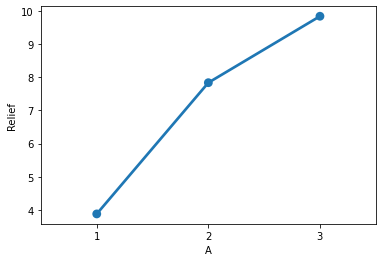

In [10]:
sns.pointplot(x = 'A', y = 'Relief', data=df, ci=None)
plt.show()

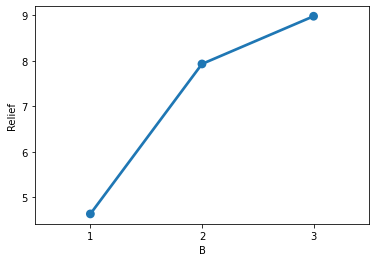

In [11]:
sns.pointplot(x = 'B', y = 'Relief', data=df, ci=None)
plt.show()

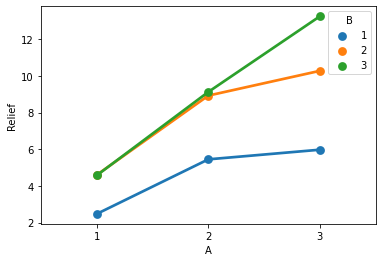

In [12]:
sns.pointplot(x = 'A', y = 'Relief', hue= 'B', data=df, ci=None)
plt.show()



By observing the interaction plot between Variable A and Variable B, we can say that there is an interaction between Variable A and Variable B based on the response variable Relief. We can conclude that there is an interaction between compound A and B.

We can also verify the Interaction Effect using python ANOVA mothod in jupyter notebook.


In [13]:
#Interaction Effect:
model=ols('Relief ~ C(A)+C(B)+C(A):C(B)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


##### As the p value for compound A and B interaction is 6.972083e-17 which is < 0.05 , there seems to have statistical interaction.

### Question 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

### Answer 1.5:

### Two Way Anova

#### Formulation of the hypothesis of the two-way ANOVA

$H_0$ : The mean hours of relief with respect to different levels of compound A and B are equal.


$H_1$ : At least one of the mean hours of relief with respect to different levels of compound A and B are not equal.


ANOVA is based on the following assumptions,
1. The samples should be independent
2. The data resembles a Normal distribution
3. The variances across different variables are same

#### Here we are assuming the level of significance as 0.05

##### To check the normality, Seaborn Distplot has been used. Based on the histogram, it is observed that the distribution is not normal. So, more data might  be needed to include for it to become normal. But, as of now, we will proceed with the given data.
 




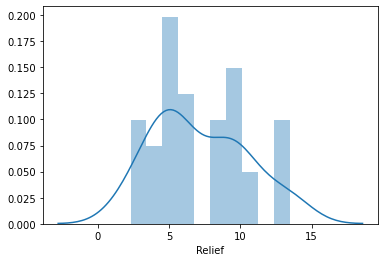

In [14]:
sns.distplot(df['Relief'],bins = 10)
plt.show()

In [15]:
#2 way ANOVA without Interaction Effect:
model=ols('Relief ~ C(A)+C(B)',data=df).fit()
aov_table=anova_lm(model,type=2)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


##### Considering both the factors(A and B), A has the p value of 8.514029e-15 which is <0.05 and  B has the p value of 1.546749e-11 which is <0.05. So, both the compound A and B are significant for Relief.

In [16]:
#2 way ANOVA with Interaction Effect:
model=ols('Relief ~ C(A)+C(B)+C(A):C(B)',data=df).fit()
aov_table=anova_lm(model,type=3)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


##### Considering both the factors A and B along with the interaction between the A and B, it is observed that A has the p value of 1.514043e-29 which is <0.05 and  B has the p value of 3.348751e-26 which is <0.05. Also, interaction of A and B has p value of 6.972083e-17 which is <0.05 .So, both the compound A and B and their interaction (A*B) are significant for Relief.

### Question 1.6) Mention the business implications of performing ANOVA for this particular case study.

### Answer 1.6:












##### The following are the some of the observations/recommendations from ANOVA exercise which may impact business decisions (assuming that the volunteers react to the compound identically) ,

1. All 3 levels of both 'A' and 'B' ingredients have impact on the 'Relief' assuming the compound contains either 'A' or 'B'. Levels 2 and 3 are more effective in 'Relief' than level 1 if considered individually. One way ANOVA also confirms the same. 

2. If both 'A' and 'B' ingredients are considered along with their interaction among different levels (1 to 3), it is observed that there is a noticeable change in 'Relief' mean hours. Two way ANOVA also confirms the changes.

3. Highest mean 'Relief' hours can be seen in interaction of level 3 of 'A' and level 3 of 'B'. (from interaction plot)

4. Lowest mean 'Relief' hours can be seen in interaction of level 1 of 'A' and level 1 of 'B'. (from interaction plot)

5. Moreover, if the level 1 of 'B' is ignored from the dataset, still there is a significant 'Relief' hours which can be expected from the interaction between level 1,2 & 3 of 'A' and level 2 & 3 of 'B'. 

6. So, if maximizing 'Relief' hours is the only intention of developing this compound, then we can even ignore level 1 of 'A', thus leaving only two levels ( level 2 & 3) for 'A' and 'B'. In that case, the laboratory can have the following advantages  businesswise,

  a) Lesser time to release the final compound (drug) as there are only 2 levels (2x2) of design experimentation. Lesser the variability more is the probability of success rate.
  
  b) Less cost involving compounds, less number of equipment required to vary the ingredients in experiement.
  
  c) Minimize other associated cost like out of pocket etc.
  
7. Finally, such impacts may not be so realistic in magnitude, but modest action will have an impact on business.